In [1]:
# Jalankan Code Ini
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_concrete= pd.read_excel('Concrete_Data.xls').copy()
df_concrete.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [3]:
df_concrete.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

In [4]:
df_concrete.rename(columns={'Cement (component 1)(kg in a m^3 mixture)':'cement',
                    'Blast Furnace Slag (component 2)(kg in a m^3 mixture)':'blast_furnace',
                    'Fly Ash (component 3)(kg in a m^3 mixture)':'fly_ash',
                    'Water  (component 4)(kg in a m^3 mixture)':'water',
                    'Superplasticizer (component 5)(kg in a m^3 mixture)':'sp',
                    'Coarse Aggregate  (component 6)(kg in a m^3 mixture)':'coarse_agg',
                    'Fine Aggregate (component 7)(kg in a m^3 mixture)':'fine_agg',
                    'Age (day)':'age',
                    'Concrete compressive strength(MPa, megapascals) ':"fc'"
                    },inplace=True)

df_concrete.head()                    

,cement,blast_furnace,fly_ash,water,sp,coarse_agg,fine_agg,age,fc'
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [5]:
df_concrete = df_concrete[df_concrete['age']<=28]

In [6]:
# Buat input & output
def split_input_output(data, target_column):
    x = data.drop(columns = target_column)
    y = data[target_column]

    return x, y

X, y = split_input_output(data = df_concrete,
                          target_column = "fc'")

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2,
                                                    random_state = 42)

In [8]:
from sklearn.metrics import mean_squared_error

baseline_pred = np.mean(y_train)
print(baseline_pred)

baseline_mse = mean_squared_error(y_train, 
                                  np.ones(len(y_train)) * baseline_pred)
print(baseline_mse)

30.674085595830583
217.87359036761075


EDA

In [9]:
#Gabungkan input dan output untuk mempermudah analisis sebelum modelling
df_train = pd.concat([X_train, y_train], axis=1)

#Cek dimensi dataset
df_train.shape

(599, 9)

In [10]:
#Cek tipe data dalam dataset 
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 599 entries, 875 to 199
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   cement         599 non-null    float64
 1   blast_furnace  599 non-null    float64
 2   fly_ash        599 non-null    float64
 3   water          599 non-null    float64
 4   sp             599 non-null    float64
 5   coarse_agg     599 non-null    float64
 6   fine_agg       599 non-null    float64
 7   age            599 non-null    int64  
 8   fc'            599 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 46.8 KB


In [11]:
#Cek data hilang atau kosong
df_train.isna().sum()

cement           0
blast_furnace    0
fly_ash          0
water            0
sp               0
coarse_agg       0
fine_agg         0
age              0
fc'              0
dtype: int64

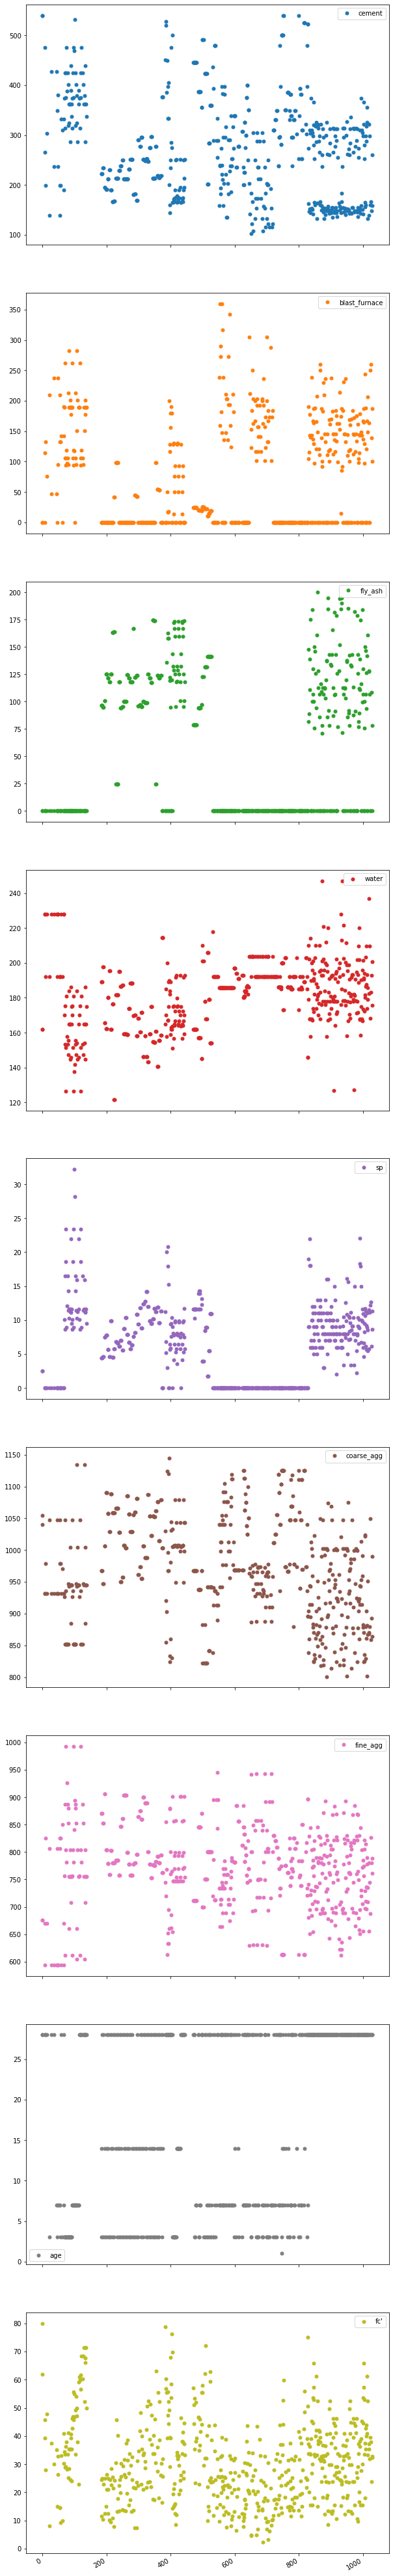

In [12]:
# Plot fitur dengan data numerik untuk melihat sebaran data
df_train.plot(lw=0, marker=".", subplots=True, figsize=(10, 80), markersize=10);

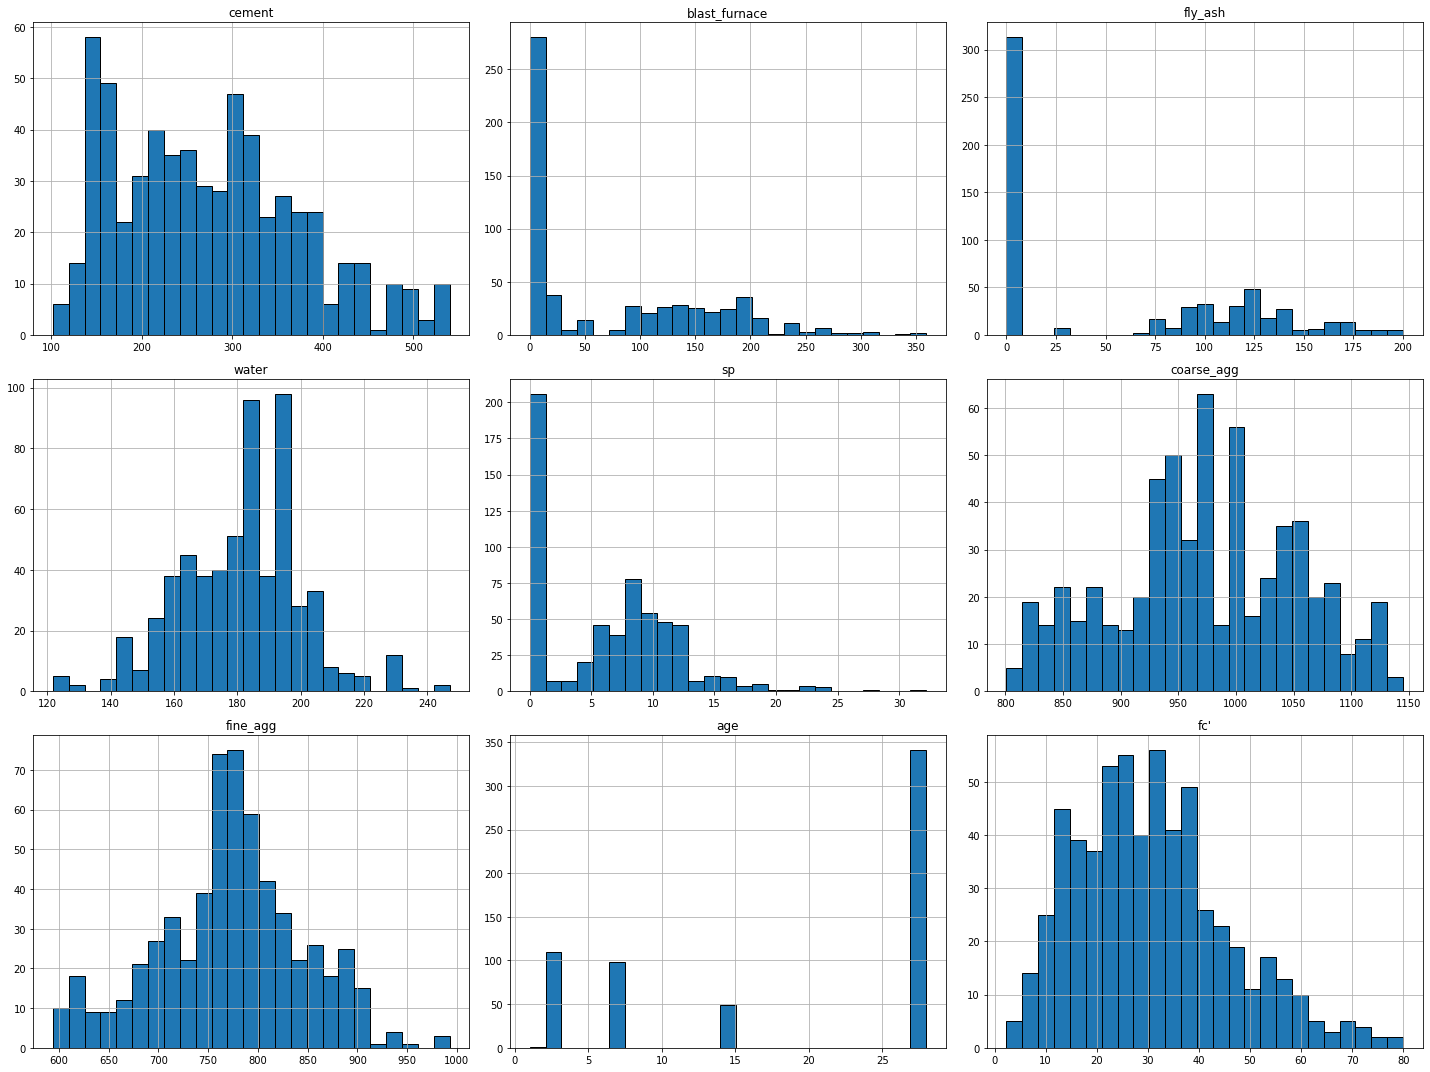

In [13]:

df_train.hist(bins=25, figsize=(20, 15), layout=(-1, 3), edgecolor="black")
plt.tight_layout();

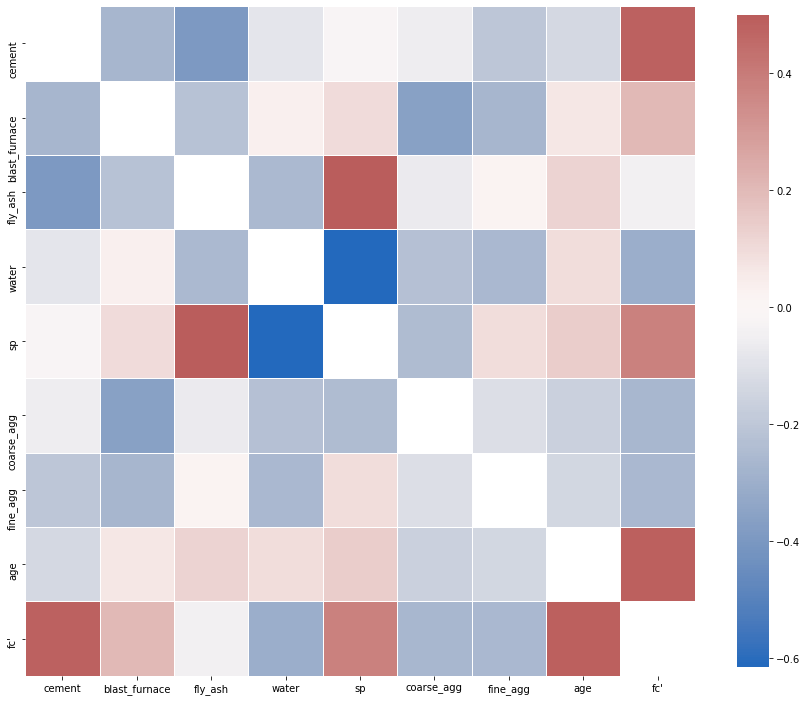

In [14]:
# Hitung korelasi antar fitur
df_corr = df_train.corr(method="spearman")

# Plot matriks korelasi
plt.figure(figsize=(15, 15))
sns.heatmap(df_corr, mask=np.eye(len(df_corr)), square=True,
            center=0, fmt='', linewidths=.5,
            cmap="vlag", cbar_kws={"shrink": 0.8});

In [15]:
from scipy.optimize import curve_fit
def regression(x,a,b,c,d):
    X = x.iloc[:,0]
    t = x.iloc[:,1]
    return(a*(X**b)*(c*(np.log(t))+d))

X = X_train['water']/X_train['cement']
t = X_train['age'].replace([0],1).astype('float64')

var = pd.concat([X,t],axis=1)

p_par,p_cov =curve_fit(regression,var,y_train)
p_par

array([ 1.9444242 , -0.77397631,  3.21527651,  3.15471056])

Normalize


In [16]:
from sklearn.preprocessing import StandardScaler

def normalize(data_train,data_test):
    # Buat objek scaler
    scaler = StandardScaler()

    if type(data_train)==pd.Series:
        # Reshape data
        data_train_reshaped = data_train.values.reshape(-1, 1)
        data_test_reshaped = data_test.values.reshape(-1, 1)

        # Fit pada data train
        scaler.fit(data_train_reshaped)

        # Transform scaler pada data_train
        data_train_scaled = scaler.transform(data_train_reshaped)
        data_train_scaled = pd.Series(data_train_scaled.reshape(-1))
        data_train_scaled.name = data_train.name
        
        # Transform scaler pada data_test
        data_test_scaled = scaler.transform(data_test_reshaped)
        data_test_scaled = pd.Series(data_test_scaled.reshape(-1))
        data_test_scaled.name = data_test.name

    else:
        # Fit pada data train
        scaler.fit(data_train)

        # Transform scaler pada data_train
        data_train_scaled = scaler.transform(data_train)
        data_train_scaled = pd.DataFrame(data_train_scaled)
        data_train_scaled.columns = data_train.columns

        # Transform scaler pada data_test
        data_test_scaled = scaler.transform(data_test)
        data_test_scaled = pd.DataFrame(data_test_scaled)
        data_test_scaled.columns = data_test.columns
    
    data_train_scaled.index = data_train.index
    data_test_scaled.index = data_test.index

    return data_train_scaled, data_test_scaled

def denormalize(data_train,input):
    # Buat objek scaler
    scaler = StandardScaler()

    if type(data_train)==pd.Series:
        # Fit pada data train
        scaler.fit(data_train.values.reshape(-1, 1))
    return scaler.inverse_transform(pd.Series(input).values.reshape(-1, 1))

In [17]:
X_train_scaled, X_test_scaled = normalize(X_train,X_test)

In [18]:
y_train_scaled, y_test_scaled = normalize(y_train,y_test)

In [19]:

# # Buat objek scaler
# scaler_x = StandardScaler()

# # Fit pada data train
# scaler_x.fit(X_train)

# # Transform scaler pada x_train & x_test
# X_train_scaled = scaler_x.transform(X_train)
# X_train_scaled = pd.DataFrame(X_train_scaled)
# X_train_scaled.columns = X_train.columns
# X_train_scaled.index = X_train.index

# X_test_scaled = scaler_x.transform(X_test)
# X_test_scaled = pd.DataFrame(X_test_scaled)
# X_test_scaled.columns = X_test.columns
# X_test_scaled.index = X_test.index

# # Buat objek scaler
# scaler_y = StandardScaler()

# # Fit pada data train
# scaler_y.fit(y_train.values.reshape(-1, 1))

# # Transform scaler pada y_train & y_test
# y_train_scaled = scaler_y.transform(y_train.values.reshape(-1, 1))
# y_train_scaled = pd.Series(y_train_scaled.reshape(-1))
# y_train_scaled.name = y_train.name
# y_train_scaled.index = y_train.index


# y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1))
# y_test_scaled = pd.Series(y_test_scaled.reshape(-1))
# y_test_scaled.name = y_test.name
# y_test_scaled.index = y_test.index

In [20]:
# sns.pairplot(X_train_scaled, height=1, plot_kws={"s": 2, "alpha": 0.2},y_vars=y_train_scaled);

In [21]:
# summary_train_scaled_pred = pd.DataFrame({"actual": y_train_scaled,
#                                           "prediction": y_scaled_pred})

# summary_train_scaled_pred.head()

In [22]:
# Plot hasil
# fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))

# # ax[0].scatter(summary_train_pred["actual"], summary_train_pred["prediction"])
# # ax[0].plot([0, 30], [0, 30], "--k")

# # ax[0].set_xlabel("Actual")
# # ax[0].set_ylabel("Prediction")
# # ax[0].set_xlim(0, 30)
# # ax[0].set_ylim(0, 30)

# ax.scatter(summary_train_scaled_pred["actual"], summary_train_scaled_pred["prediction"])
# ax.plot([0, 30], [0, 30], "--k")

# ax.set_xlabel("Actual")
# ax.set_ylabel("Prediction")
# ax.set_xlim(0, 30)
# ax.set_ylim(0, 30)

# plt.show()

In [23]:
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

model_params = {
    'support_vector': {
        'model': SVR(),
        'params' : {
            'C': [0.01, 0.1, 1, 10, 100, 200],
            'kernel': ['rbf'],
            'epsilon':[0.001, 0.01, 0.1, 1, 10]
        }    
    },
    'random_forest': {
        'model': RandomForestRegressor(),
        'params' : {
            'n_estimators': [50, 100, 200, 500, 1000, 2000],
            'max_features': [1, 2, 3, 4, 5]
        }
    }
}

In [24]:
def grid_cross_val(input, output, parameters):
    from sklearn.model_selection import GridSearchCV
    best_scores = []
    all_scores = {}


    for model_name, mp in parameters.items():
        grid_cv = GridSearchCV(mp['model'], mp['params'], cv=4, return_train_score=False)
        grid_cv.fit(input,output)
        
        best_scores.append({
            'model': model_name,
            'best_score': grid_cv.best_score_,
            'best_params': grid_cv.best_params_,
        })
        all_scores[model_name]=(grid_cv.cv_results_)
    return best_scores,all_scores

best_scores, all_scores = grid_cross_val(X_train_scaled,y_train_scaled,model_params)
    
grid_cv = pd.DataFrame(best_scores,columns=['model','best_score','best_params'])
grid_cv

,model,best_score,best_params
0,support_vector,0.848377,"{'C': 10, 'epsilon': 0.1, 'kernel': 'rbf'}"
1,random_forest,0.864684,"{'max_features': 5, 'n_estimators': 1000}"


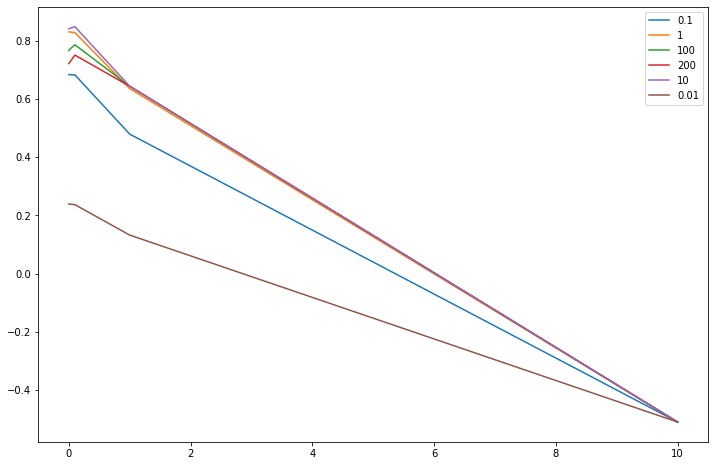

In [25]:
svr_score = pd.DataFrame(all_scores['support_vector'])[['param_C','param_epsilon','mean_test_score','rank_test_score']]

categories = set(svr_score['param_C'])

plt.figure(figsize=(12,8))

for c in categories:
    parameter = svr_score.loc[svr_score['param_C']==c]
    plt.plot(parameter['param_epsilon'],parameter['mean_test_score'], label = c)

plt.legend()

plt.show()

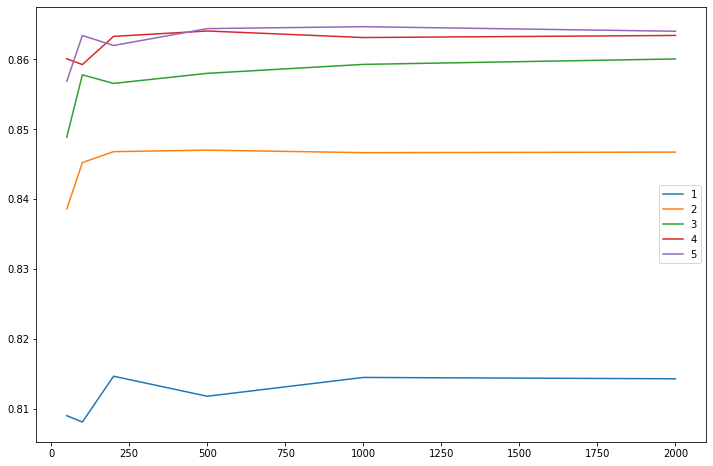

In [26]:
random_forest_score = pd.DataFrame(all_scores['random_forest'])[['param_max_features','param_n_estimators','mean_test_score','rank_test_score']]

categories = set(random_forest_score['param_max_features'])

plt.figure(figsize=(12,8))

for n in categories:
    parameter = random_forest_score.loc[random_forest_score['param_max_features']==n]
    plt.plot(parameter['param_n_estimators'],parameter['mean_test_score'], label = n)

plt.legend()

plt.show()

In [27]:
model_params_2 = {
    'support_vector': {
        'model': SVR(),
        'params' : {
            'C': [num for num in range(4,21)],
            'kernel': ['rbf'], 
            'epsilon':[num/10 for num in range(0, 6, 1)]
        }
    },
    'random_forest': {
        'model': RandomForestRegressor(),
        'params' : {
            'n_estimators': [num for num in range(50,1001,50)],
            'max_features': [num for num in range (4,9)]
        }
    }
}

best_scores, all_scores = grid_cross_val(X_train_scaled,y_train_scaled,model_params_2)
    
grid_cv = pd.DataFrame(best_scores,columns=['model','best_score','best_params'])
grid_cv

,model,best_score,best_params
0,support_vector,0.848734,"{'C': 9, 'epsilon': 0.1, 'kernel': 'rbf'}"
1,random_forest,0.865153,"{'max_features': 5, 'n_estimators': 300}"


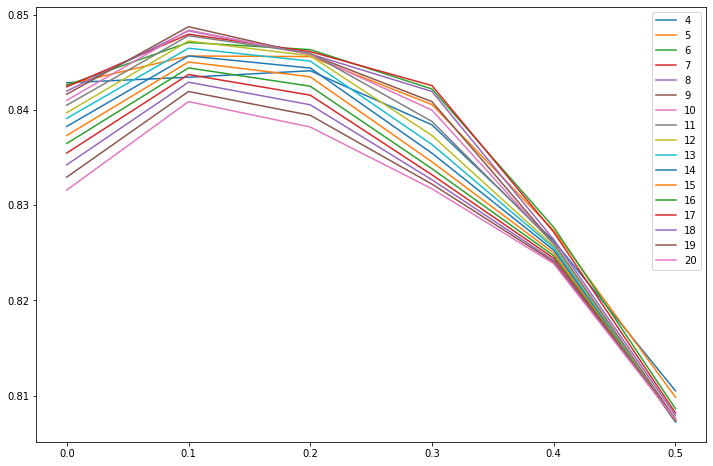

In [28]:
svr_score = pd.DataFrame(all_scores['support_vector'])[['param_C','param_epsilon','mean_test_score','rank_test_score']]

categories = set(svr_score['param_C'])

plt.figure(figsize=(12,8))

for c in categories:
    parameter = svr_score.loc[svr_score['param_C']==c]
    plt.plot(parameter['param_epsilon'],parameter['mean_test_score'], label = c)

plt.legend()

plt.show()

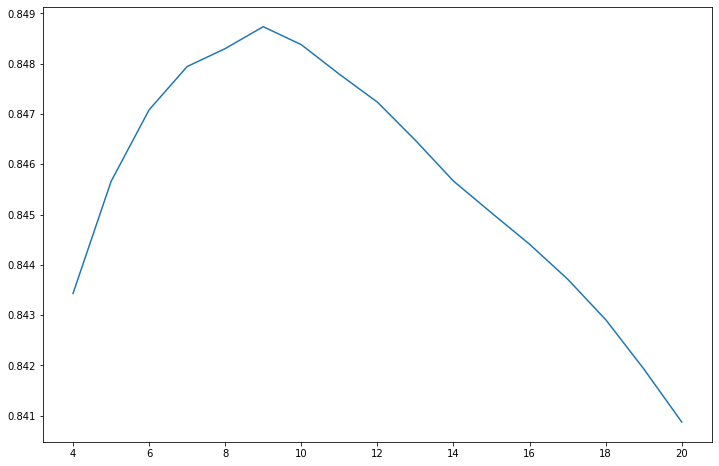

In [38]:
svr_score = pd.DataFrame(all_scores['support_vector'])[['param_C','param_epsilon','mean_test_score','rank_test_score']]

plt.figure(figsize=(12,8))

plt.plot(svr_score.loc[svr_score['param_epsilon']==0.1]['param_C'],svr_score.loc[svr_score['param_epsilon']==0.1]['mean_test_score'])

plt.show()

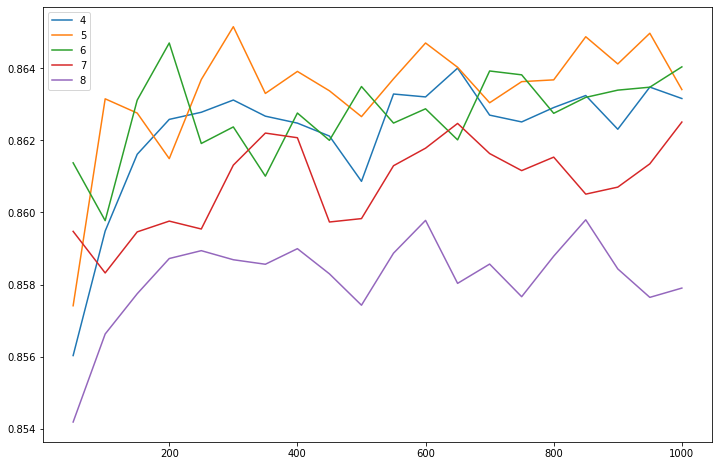

In [30]:
random_forest_score = pd.DataFrame(all_scores['random_forest'])[['param_max_features','param_n_estimators','mean_test_score','rank_test_score']]

categories = set(random_forest_score['param_max_features'])

plt.figure(figsize=(12,8))

for n in categories:
    parameter = random_forest_score.loc[random_forest_score['param_max_features']==n]
    plt.plot(parameter['param_n_estimators'],parameter['mean_test_score'], label = n)

plt.legend()

plt.show()

In [31]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score

In [32]:
def regression_metrics(value,prediction):
    metrics={}
    metrics['MAE']=mean_absolute_error(value,prediction)
    metrics['MSE']=mean_squared_error(value,prediction)
    metrics['MAPE']=mean_absolute_percentage_error(value,prediction)
    metrics['R2 Score']=r2_score(value,prediction)
    return metrics


In [39]:
svr = SVR(
    kernel='rbf',
    C=9,
    epsilon=0.1
    )
svr.fit(X_train_scaled,y_train_scaled)
y_pred_svr = svr.predict(X_test_scaled)
y_pred_svr = denormalize(y_train,y_pred_svr)

support_vector_regression = regression_metrics(y_test,y_pred_svr)

In [40]:
rfr = RandomForestRegressor(
                            max_features=5,
                            n_estimators=300
                            )
rfr.fit(X_train_scaled,y_train_scaled)
y_pred_rfr = rfr.predict(X_test_scaled)
y_pred_rfr = denormalize(y_train,y_pred_rfr)

random_forest_regression = regression_metrics(y_test,y_pred_rfr)


In [41]:
X = X_test['water']/X_test['cement']
t = X_test['age'].replace([0],1).astype('float64')
variable = pd.concat([X,t],axis=1)

formula = regression(variable,p_par[0],p_par[1],p_par[2],p_par[3])
conventional = regression_metrics(y_test,formula)


In [42]:
result = pd.DataFrame({'Model': ['Conventional Regression Formula','Support Vector Machine','Random Forest']})
result = pd.concat([result,pd.DataFrame([conventional,support_vector_regression,random_forest_regression])],axis=1)
result

,Model,MAE,MSE,MAPE,R2 Score
0,Conventional Regression Formula,7.646846,99.732128,0.303059,0.649547
1,Support Vector Machine,3.735096,29.598952,0.133818,0.895991
2,Random Forest,4.314861,47.355001,0.162739,0.833597
